In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
car_r=pd.read_csv(r'C:\Users\SRKT\Desktop\autos.csv',encoding='latin1')

In [3]:
car_r.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
car_r.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
columns_keep=['brand','model','vehicleType','yearOfRegistration',
                   'monthOfRegistration','kilometer','powerPS','fuelType',
                   'gearbox','abtest','notRepairedDamage','price']

In [7]:
car_r=car_r[columns_keep]

In [8]:
car_r.head()

,brand,model,vehicleType,yearOfRegistration,monthOfRegistration,kilometer,powerPS,fuelType,gearbox,abtest,notRepairedDamage,price
0,volkswagen,golf,NaN,1993,0,150000,0,benzin,manuell,test,NaN,480
1,audi,NaN,coupe,2011,5,125000,190,diesel,manuell,test,ja,18300
2,jeep,grand,suv,2004,8,125000,163,diesel,automatik,test,NaN,9800
3,volkswagen,golf,kleinwagen,2001,6,150000,75,benzin,manuell,test,nein,1500
4,skoda,fabia,kleinwagen,2008,7,90000,69,diesel,manuell,test,nein,3600


In [16]:

car_r=car_r.dropna()
car_r.isnull().sum()

brand                  0
model                  0
vehicleType            0
yearOfRegistration     0
monthOfRegistration    0
kilometer              0
powerPS                0
fuelType               0
gearbox                0
abtest                 0
notRepairedDamage      0
price                  0
dtype: int64

In [17]:
car_r.head()

,brand,model,vehicleType,yearOfRegistration,monthOfRegistration,kilometer,powerPS,fuelType,gearbox,abtest,notRepairedDamage,price
3,volkswagen,golf,kleinwagen,2001,6,150000,75,benzin,manuell,test,nein,1500
4,skoda,fabia,kleinwagen,2008,7,90000,69,diesel,manuell,test,nein,3600
5,bmw,3er,limousine,1995,10,150000,102,benzin,manuell,test,ja,650
6,peugeot,2_reihe,cabrio,2004,8,150000,109,benzin,manuell,test,nein,2200
7,volkswagen,andere,limousine,1980,7,40000,50,benzin,manuell,test,nein,0


In [18]:
car_r['km/1000']=car_r['kilometer']/1000

In [27]:
def age_count(yr, mt):
     return (2019-yr)*12+(12-mt)+6
car_r['age_months'] = age_count(car_r['yearOfRegistration'],car_r['monthOfRegistration'])

In [28]:
car_r.head()

,brand,model,vehicleType,yearOfRegistration,monthOfRegistration,kilometer,powerPS,fuelType,gearbox,abtest,notRepairedDamage,price,km/1000,age_months
3,volkswagen,golf,kleinwagen,2001,6,150000,75,benzin,manuell,test,nein,1500,150.0,228
4,skoda,fabia,kleinwagen,2008,7,90000,69,diesel,manuell,test,nein,3600,90.0,143
5,bmw,3er,limousine,1995,10,150000,102,benzin,manuell,test,ja,650,150.0,296
6,peugeot,2_reihe,cabrio,2004,8,150000,109,benzin,manuell,test,nein,2200,150.0,190
7,volkswagen,andere,limousine,1980,7,40000,50,benzin,manuell,test,nein,0,40.0,479


In [38]:
columns_to_keep = ['brand','model','vehicleType','yearOfRegistration','age_months','km/1000',
                   'powerPS','fuelType','gearbox','abtest','notRepairedDamage','price']
car_r = car_r[columns_to_keep]
car_r.head()

,brand,model,vehicleType,yearOfRegistration,age_months,km/1000,powerPS,fuelType,gearbox,abtest,notRepairedDamage,price
3,volkswagen,golf,kleinwagen,2001,228,150.0,75,benzin,manuell,test,nein,1500
4,skoda,fabia,kleinwagen,2008,143,90.0,69,diesel,manuell,test,nein,3600
5,bmw,3er,limousine,1995,296,150.0,102,benzin,manuell,test,ja,650
6,peugeot,2_reihe,cabrio,2004,190,150.0,109,benzin,manuell,test,nein,2200
7,volkswagen,andere,limousine,1980,479,40.0,50,benzin,manuell,test,nein,0


In [40]:
car_r.replace({'gearbox':{'manuell':'manual','automatik':'automatic'}},inplace=True)
car_r.replace({'vehicleType':{'kleinwagen':'small_car','kombi':'combi','andere':'Others'}},inplace=True)
car_r.replace({'fuelType':{'benzin':'petrol','andere':'others','elektro':'electro'}},inplace=True)
car_r.replace({'notRepairedDamage':{'nein':'no','ja':'yes'}},inplace=True)

In [41]:
car_r.head()

,brand,model,vehicleType,yearOfRegistration,age_months,km/1000,powerPS,fuelType,gearbox,abtest,notRepairedDamage,price
3,volkswagen,golf,small_car,2001,228,150.0,75,petrol,manual,test,no,1500
4,skoda,fabia,small_car,2008,143,90.0,69,diesel,manual,test,no,3600
5,bmw,3er,limousine,1995,296,150.0,102,petrol,manual,test,yes,650
6,peugeot,2_reihe,cabrio,2004,190,150.0,109,petrol,manual,test,no,2200
7,volkswagen,andere,limousine,1980,479,40.0,50,petrol,manual,test,no,0


In [57]:
car_r=car_r[(car_r.age_months >= 0)&(car_r.price <= 150000)&
                     (car_r.price>100)]
car_r.head()
len(car_r)

233381

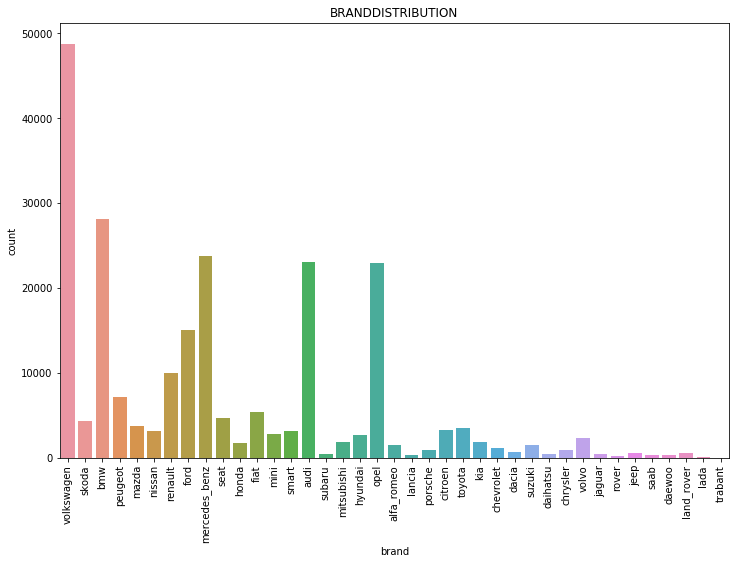

In [55]:
plt.figure(figsize=(12,8))
plt.title('BRANDDISTRIBUTION')
ax=sns.countplot(car_r['brand'])
rotg =ax.set_xticklabels(ax.get_xticklabels(), rotation=90)



In [66]:
skoda_car=car_r[car_r.brand=='skoda']
print('no of skoda car on sale:',len(skoda_car),'and mean price of the car is',int(np.mean(skoda_car.price)),'Euro')
bmw_car=car_r[car_r.brand=='bmw']
print('no od bmw car on sale :',len(bmw_car),'and mean price of the bmw car is',int(np.mean(bmw_car.price)),'Euro')

no of skoda car on sale: 4354 and mean price of the car is 7169 Euro
no od bmw car on sale : 28154 and mean price of the bmw car is 9055 Euro


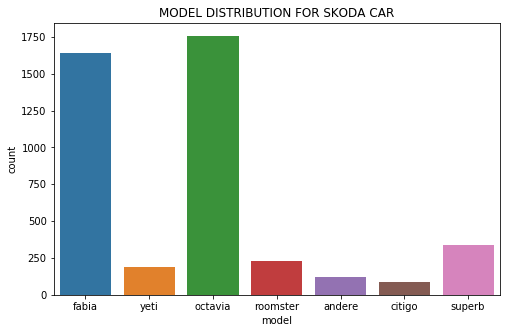

In [68]:
plt.figure(figsize=(8,5))
plt.title("MODEL DISTRIBUTION FOR SKODA CAR")
sns.countplot(skoda_car['model'])

<Figure size 720x576 with 0 Axes>

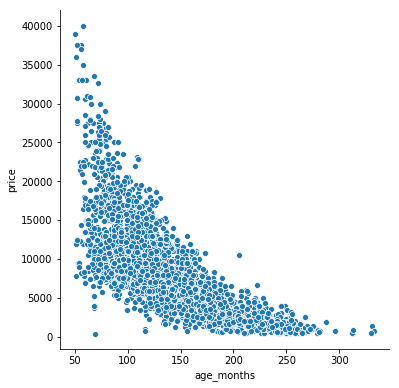

In [75]:
skoda_car=skoda_car[(skoda_car.price<50000)&(skoda_car.age_months<400)]
plt.figure(figsize=(10,8))
sns.pairplot(skoda_car,x_vars=['age_months'],y_vars=['price'],height=5.5)

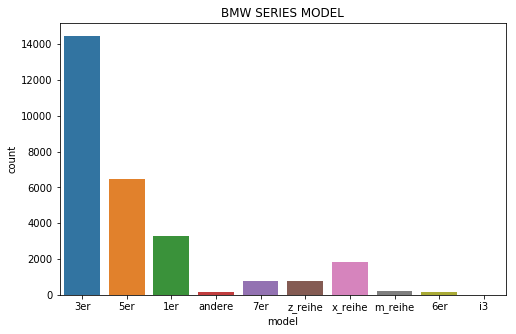

In [78]:
plt.figure(figsize=(8,5))
plt.title("BMW SERIES MODEL")
sns.countplot(bmw_car['model'])

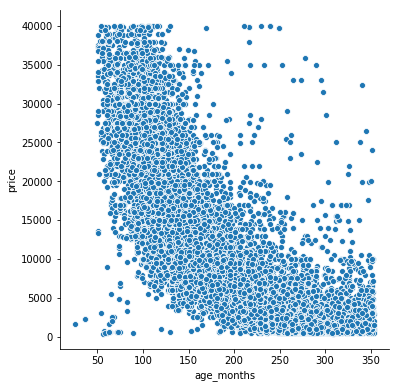

In [82]:
bmw_car=bmw_car[(bmw_car.price<70000)&(bmw_car.age_months<700)]
sns.pairplot(bmw_car,x_vars=['age_months'],y_vars=['price'],height=5.5)

In [95]:
x=skoda_car[['age_months','km/1000','powerPS']]
xb=bmw_car[['age_months','km/1000','powerPS']]
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x=poly.fit_transform(x)
xb=poly.fit_transform(xb)

In [99]:
y=skoda_car['price']
yb=bmw_car['price']
print('no of skoda car on sale is:',len(y),'and mean is :',int(np.mean(skoda_car.price)),'Euro')
print('no of bmw car on sale is :',len(yb),'and mean is:',int(np.mean(bmw_car.price)),'Euro')

no of skoda car on sale is: 4354 and mean is : 7169 Euro
no of bmw car on sale is : 28154 and mean is: 9055 Euro


In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
xb_train,xb_test,yb_train,yb_test=train_test_split(xb,yb,test_size=0.30)

In [107]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
lnr.fit(x_train,y_train)
y_pred=lnr.predict(x_test)


In [110]:
lnr.fit(xb_train,yb_train)
y_pred1=lnr.predict(xb_test)

In [118]:
from sklearn.metrics import r2_score
print("r2 score for skoda:",r2_score(y_pred,y_test))
print("r2 score for bmw:",r2_score(y_pred1,yb_test))

r2 score for skoda: 0.2501146589134271
r2 score for bmw: 0.6483296627790698


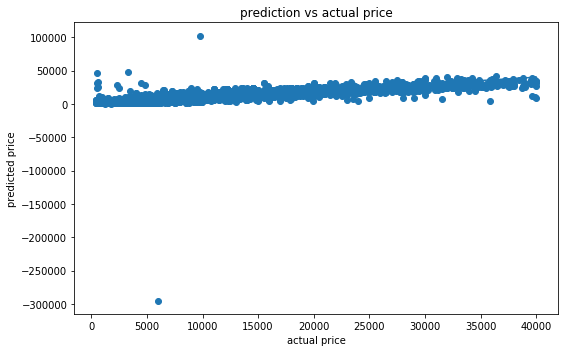

In [128]:
plt.figure(figsize=(8,5))
plt.scatter(yb_test,y_pred1)
plt.title("prediction vs actual price")
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.plot([min(yb_test),max(yb_test)],[min(yb_test),max(yb_test)])
plt.tight_layout()

In [319]:
car_r=car_r[(car_r.price<80000)&(car_r.age_months<800)]
x2=car_r[['age_months','km/1000','powerPS']]
x2=poly.fit_transform(x2)
y2=car_r['price']
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.25)
lnr.fit(x2_train,y2_train)
y_pred3=lnr.predict(x2_test)


In [320]:
print("r2 score for car:",r2_score(y_pred3,y2_test))

r2 score for car: 0.5353290163921838


In [321]:
print(lnr.score(x2_test, y2_test)*100,'% Prediction Accuracy')

70.63631860811137 % Prediction Accuracy


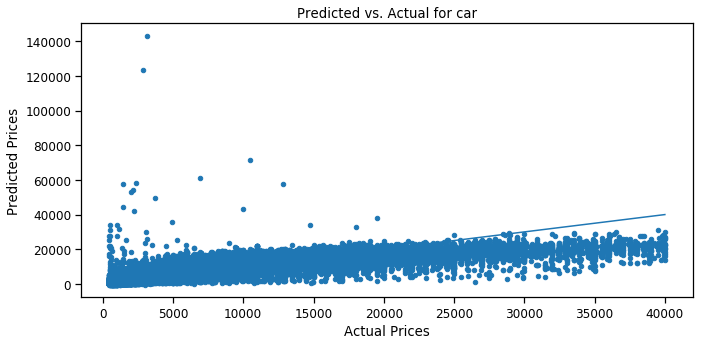

In [322]:
sns.set_context("notebook", font_scale=1.1)
plt.figure(figsize=(10, 5))
plt.scatter(y2_test, y_pred3, s=20)
plt.title('Predicted vs. Actual for car')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)])
plt.tight_layout()